In [1]:
pip install shap


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import shap
import xgboost
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Load model and test data
from xgboost import XGBClassifier
import joblib

# Load model
df = pd.read_csv("../data/processed/cleaned_bank_churn.csv")

# Separate features and target
X = df.drop("Exited", axis=1)
y = df["Exited"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
model = XGBClassifier(eval_metric='logloss', random_state=42)
model.fit(X_train, y_train)

# Create SHAP explainer
explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

# Save values
shap_df = pd.DataFrame(shap_values.values, columns=X_test.columns)
shap_df['CustomerId'] = df.loc[X_test.index, 'CustomerId'].values
shap_df.to_csv("../data/processed/shap_values.csv", index=False)


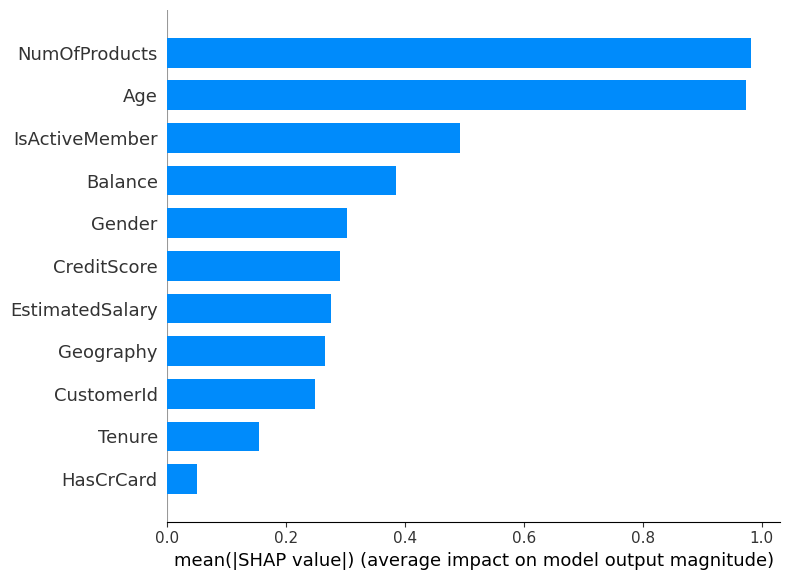

In [12]:
# Summary plot (global importance)
shap.summary_plot(shap_values, X_test, plot_type="bar")


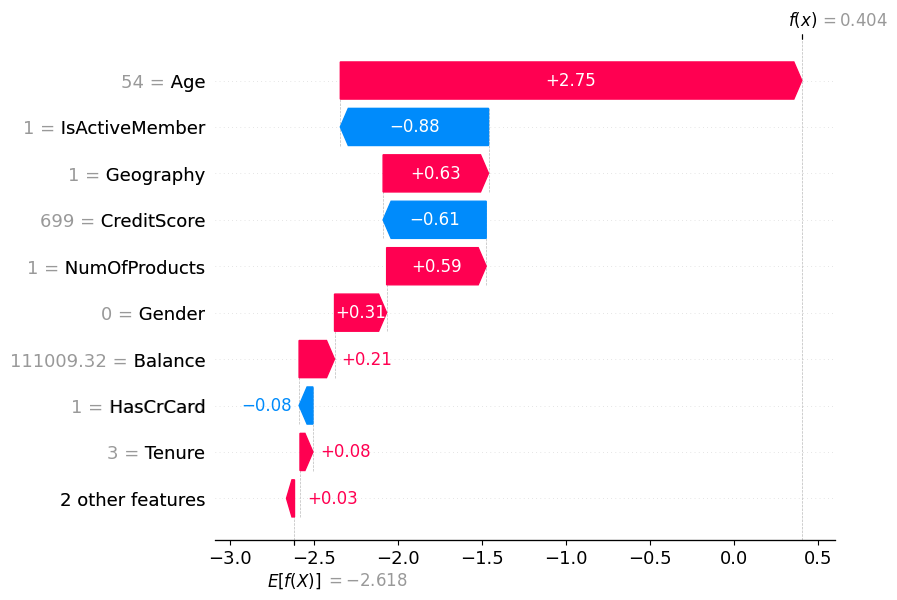

In [13]:
shap.plots.waterfall(shap_values[10])


In [14]:
retention_df = pd.read_csv("../data/processed/retention_plan.csv")
shap_df = pd.read_csv("../data/processed/shap_values.csv")

merged = retention_df.merge(shap_df, on="CustomerId", how="left")
merged.to_csv("../data/processed/retention_with_shap.csv", index=False)
